## Logistic Regression


* 이전 강의에서 Linear model에 대해서 배워 보았습니다. Linear Regression 모델은 어떤 실수를 데이터로 받아서, 실수의 값을 예측하는 모델이었습니다. 그러나 우리 실세계에서는 Binary prediction (0 이나 1을 예측하는 것)이 많이 사용되고 있습니다.

      예) 시험에 통과 할 것인지, 떨어질 것인지에 대한 것인지, 한국이 축구에 이길것인지, 질 것인지.



* 위와 같은 문제를 해결 할 수 있는 방법 ?

  **= Linear layer의 output에 "sigmoid" 식을 추가로 넣어주는 것**

#### 1. Activation Functions : Sigmoid & TanH

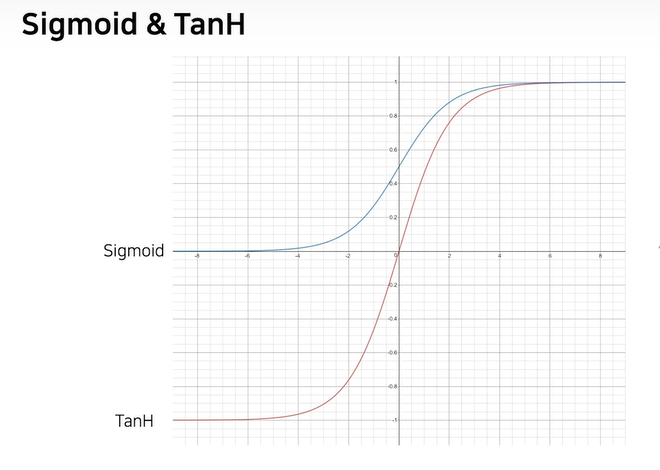




**Activation Functions**

In [1]:
# Activation Functions

import torch
import torch.nn as nn

from matplotlib import pyplot as plt

In [2]:
# torch.randn() : 평균이 0이고 표준편차가 1인 가우시안 정규분포를 이용해 생성

x = torch.sort(torch.randn(100) * 10)[0]

x

tensor([-24.2358, -23.0882, -18.1693, -17.1635, -17.0506, -16.1025, -14.9477,
        -14.7068, -14.5221, -14.5096, -14.4150, -14.3152, -12.8707, -12.5197,
        -12.2480, -12.1963, -12.0956, -11.7489, -10.4400,  -9.5236,  -9.5016,
         -9.0937,  -8.6576,  -8.1724,  -7.8879,  -7.8164,  -7.7338,  -7.7310,
         -7.3473,  -6.1682,  -5.8259,  -5.2962,  -5.0132,  -4.7705,  -4.7257,
         -4.3958,  -4.1398,  -4.0259,  -3.6178,  -3.4883,  -3.4280,  -3.1838,
         -2.9810,  -2.8419,  -2.7450,  -2.5663,  -2.2366,  -1.7559,  -1.1670,
         -0.9712,  -0.3024,   0.1418,   0.3578,   0.5316,   0.5942,   0.8304,
          0.9322,   0.9871,   1.2191,   1.3136,   1.3340,   1.5590,   1.8383,
          2.1685,   3.0092,   3.2588,   3.3571,   3.6669,   3.7318,   3.9170,
          4.2095,   4.6026,   4.6128,   4.6469,   5.1950,   5.1980,   5.3185,
          5.3497,   5.6598,   6.3410,   6.3733,   6.4782,   6.6325,   7.2603,
          8.1609,   8.3773,   8.7281,   9.4041,  10.6317,  11.01

**Sigmoid**

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

In [3]:
# 1. 객체로 사용
act = nn.Sigmoid() 
print(act(x))

tensor([2.9822e-11, 9.3956e-11, 1.2857e-08, 3.5156e-08, 3.9355e-08, 1.0157e-07,
        3.2233e-07, 4.1013e-07, 4.9330e-07, 4.9954e-07, 5.4908e-07, 6.0675e-07,
        2.5722e-06, 3.6539e-06, 4.7948e-06, 5.0492e-06, 5.5840e-06, 7.8980e-06,
        2.9239e-05, 7.3102e-05, 7.4730e-05, 1.1236e-04, 1.7377e-04, 2.8226e-04,
        3.7511e-04, 4.0289e-04, 4.3760e-04, 4.3883e-04, 6.4392e-04, 2.0906e-03,
        2.9414e-03, 4.9856e-03, 6.6057e-03, 8.4052e-03, 8.7863e-03, 1.2179e-02,
        1.5676e-02, 1.7534e-02, 2.6139e-02, 2.9647e-02, 3.1432e-02, 3.9781e-02,
        4.8290e-02, 5.5101e-02, 6.0370e-02, 7.1338e-02, 9.6511e-02, 1.4731e-01,
        2.3739e-01, 2.7464e-01, 4.2496e-01, 5.3540e-01, 5.8851e-01, 6.2986e-01,
        6.4432e-01, 6.9643e-01, 7.1752e-01, 7.2851e-01, 7.7191e-01, 7.8812e-01,
        7.9151e-01, 8.2621e-01, 8.6275e-01, 8.9739e-01, 9.5299e-01, 9.6299e-01,
        9.6634e-01, 9.7508e-01, 9.7661e-01, 9.8049e-01, 9.8536e-01, 9.9007e-01,
        9.9017e-01, 9.9050e-01, 9.9449e-

In [4]:
# 2. 함수로 사용

print(torch.sigmoid(x))

tensor([2.9822e-11, 9.3956e-11, 1.2857e-08, 3.5156e-08, 3.9355e-08, 1.0157e-07,
        3.2233e-07, 4.1013e-07, 4.9330e-07, 4.9954e-07, 5.4908e-07, 6.0675e-07,
        2.5722e-06, 3.6539e-06, 4.7948e-06, 5.0492e-06, 5.5840e-06, 7.8980e-06,
        2.9239e-05, 7.3102e-05, 7.4730e-05, 1.1236e-04, 1.7377e-04, 2.8226e-04,
        3.7511e-04, 4.0289e-04, 4.3760e-04, 4.3883e-04, 6.4392e-04, 2.0906e-03,
        2.9414e-03, 4.9856e-03, 6.6057e-03, 8.4052e-03, 8.7863e-03, 1.2179e-02,
        1.5676e-02, 1.7534e-02, 2.6139e-02, 2.9647e-02, 3.1432e-02, 3.9781e-02,
        4.8290e-02, 5.5101e-02, 6.0370e-02, 7.1338e-02, 9.6511e-02, 1.4731e-01,
        2.3739e-01, 2.7464e-01, 4.2496e-01, 5.3540e-01, 5.8851e-01, 6.2986e-01,
        6.4432e-01, 6.9643e-01, 7.1752e-01, 7.2851e-01, 7.7191e-01, 7.8812e-01,
        7.9151e-01, 8.2621e-01, 8.6275e-01, 8.9739e-01, 9.5299e-01, 9.6299e-01,
        9.6634e-01, 9.7508e-01, 9.7661e-01, 9.8049e-01, 9.8536e-01, 9.9007e-01,
        9.9017e-01, 9.9050e-01, 9.9449e-

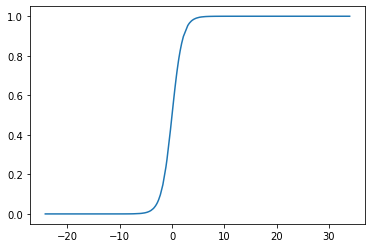

In [5]:
plt.plot(x.numpy(), torch.sigmoid(x).numpy())
plt.show()

# 미분이 가능한 sigmoid


**TanH**



In [6]:
# 1. 객체로 사용

tan = nn.Tanh()
print(tan(x))

tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999,
        -0.9999, -0.9999, -0.9998, -0.9997, -0.9995, -0.9994, -0.9986, -0.9981,
        -0.9979, -0.9966, -0.9949, -0.9932, -0.9918, -0.9883, -0.9774, -0.9420,
        -0.8233, -0.7492, -0.2935,  0.1409,  0.3433,  0.4866,  0.5329,  0.6807,
         0.7316,  0.7561,  0.8394,  0.8652,  0.8702,  0.9153,  0.9506,  0.9742,
         0.9951,  0.9970,  0.9976,  0.9987,  0.9989,  0.9992,  0.9996,  0.9998,
         0.9998,  0.9998,  0.9999,  0.9999,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.00

In [7]:
# 2. 함수로 사용 
print(torch.tanh(x))

tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999,
        -0.9999, -0.9999, -0.9998, -0.9997, -0.9995, -0.9994, -0.9986, -0.9981,
        -0.9979, -0.9966, -0.9949, -0.9932, -0.9918, -0.9883, -0.9774, -0.9420,
        -0.8233, -0.7492, -0.2935,  0.1409,  0.3433,  0.4866,  0.5329,  0.6807,
         0.7316,  0.7561,  0.8394,  0.8652,  0.8702,  0.9153,  0.9506,  0.9742,
         0.9951,  0.9970,  0.9976,  0.9987,  0.9989,  0.9992,  0.9996,  0.9998,
         0.9998,  0.9998,  0.9999,  0.9999,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.00

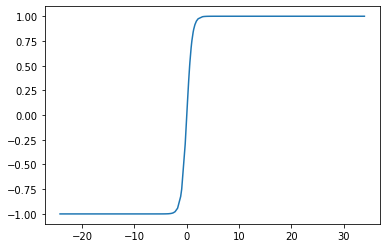

In [8]:
plt.plot(x.numpy(), torch.tanh(x).numpy())
plt.show()



---
**Logistic Regression**
- 참(true) / 거짓 (false)으로 결과가 나뉘는 함수를 만들어보자

- 이 사람은 남자인가? True(남자) / False(여자)


**Structure**

- Linear Regression과 비슷한 구조이나, 마지막에 Sigmoid 함수를 통과시킴
- Sigmoid 함수를 사용하기 때문에 1(True)과 0(False) 사이의 값을 반환
- 출력 벡터의 각 차원 별로 하나의 문제
- 아래의 예와 같은 경우 0.7(남자인가요?), 0.2(서울에 사나요?), 0.49(머리가 짧나요?)라는 3가지 문제에 대한 답변을 3차원으로 출력할 수 있다.

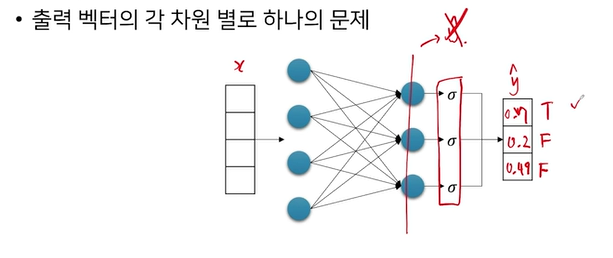

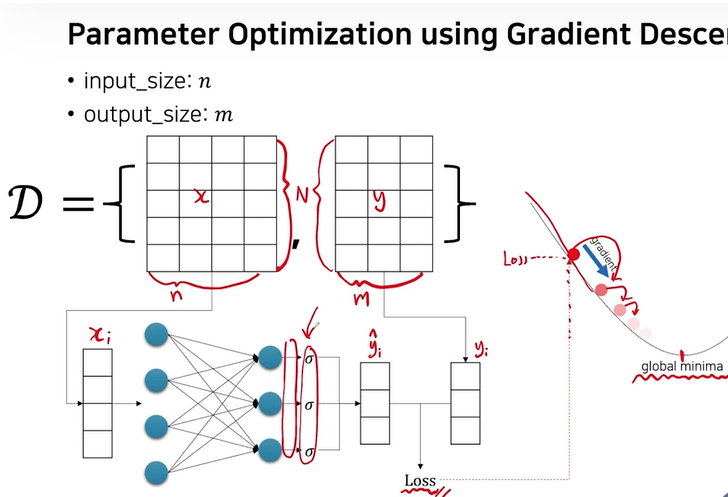

**Summary**

- 이름은 regression이지만 사실은 이진 분류(binary classification) 문제
   * Regression : y의 값이 실수로 되어있음
   * Classification : 입력과 상관없이 출력이 categorical 할 수 있음


- 기존의 선형 회귀(Linear Regression)과 다르게, Linear Layer의 결과물에 Sigmoid 함수를 활용하여 출력 값을 계산
   * sigmoid의 출력 값은 0에서 1사이의 확률 값으로 생각해볼 수 있음



---

### Loss Function : Binary Cross entropy

기존의 Linear Regression과 같은 경우 MSE를 손실함수로 사용했었는데, Logistic Regression에서는 Binary Classification을 사용하게 된다.


**Binary Classification**
- 이 사람은 Covid-19 바이러스에 걸렸는가?
    * 입력 : 키, 몸무게, 혈압, 염증 수치...
    * 출력 : True / Flase

- 확률 문제로 바꾸어서 생각하기
    * remake : 이 사람이 covid-19 바이러스에 걸렸을 확률은?
  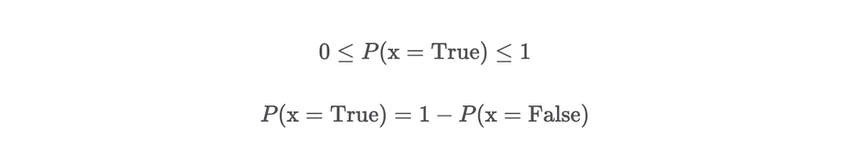

**Binary Cross Entropy**
- N개의 vector들이 주어졌을 때 수식
- yi 값에 따라 수식의 왼쪽 term과 오른쪽 term이 on/off

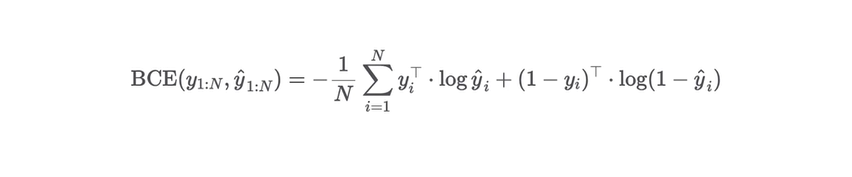

**Summary**
- Regression의 경우는 보통 손실함수 MSELoss를 활용하여 파라미터를 최적화

- Classification의 경우에는 BCELoss를 활용하여 파라미터를 최적화하여, Accuracy를 통해서 우리는 모델의 성능을 평가할 수 있다.

### Logistic Regression - 실습

**Load Dataset from sklaern**

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [11]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['class'] = cancer.target

df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


**Pair plot with mean features**

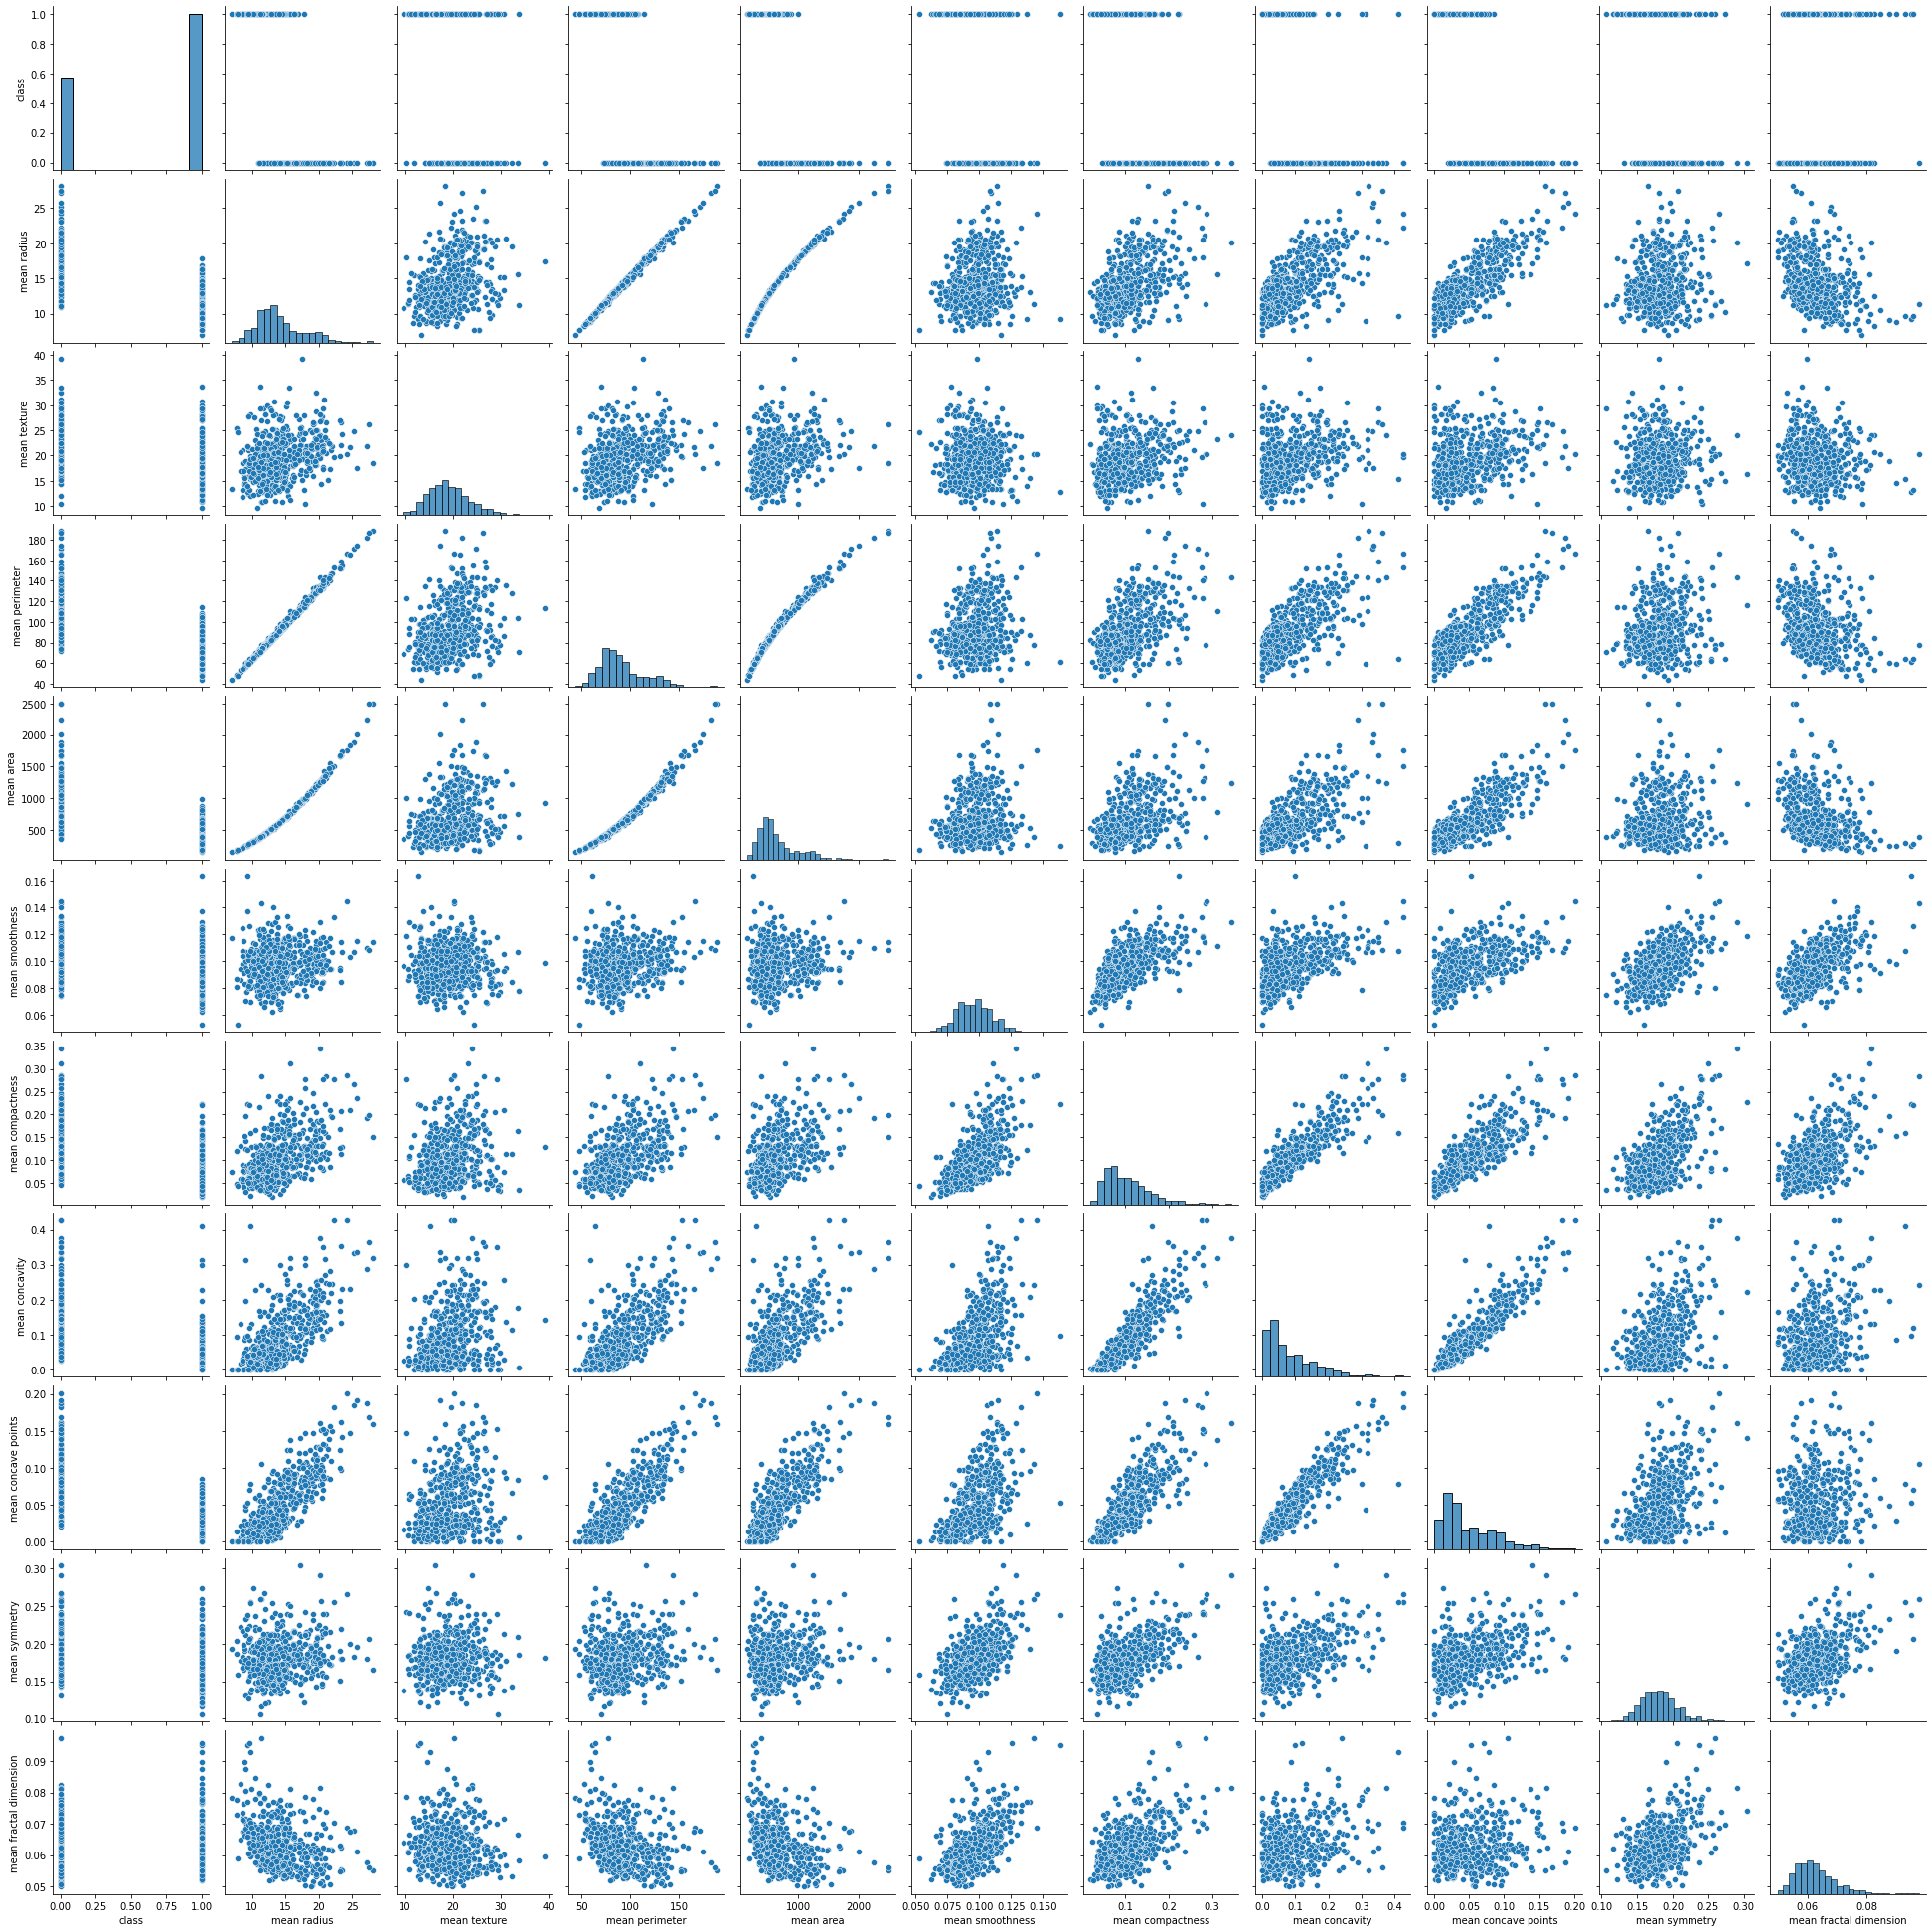

In [12]:
sns.pairplot(df[['class'] + list(df.columns[:10])])
plt.show()

**Select features**

In [13]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'class'],
      dtype='object')

In [14]:
cols = ['mean radius', 'mean texture',
       'mean smoothness', 'mean compactness',
       'mean concave points', 
       'worst radius', 'worst texture',  
       'worst smoothness', 'worst compactness',
       'worst concave points',
       'class']

- for문을 써서 cols에 해당하는 컬럼의 histplot을 그려본다.
- 각각의 속성이 클래스별로 (0/1) 어떻게 분포하는지 확인하면서 두 클래스 분포가 안겹칠수록 분리하기 쉽다고 생각할 수 있다.
-경계선을 기준으로 binary 분포를 정할 수 있다. 

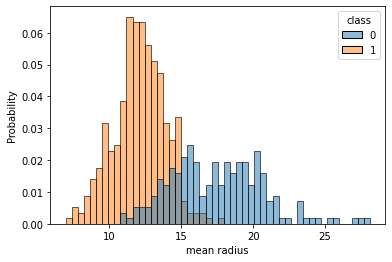

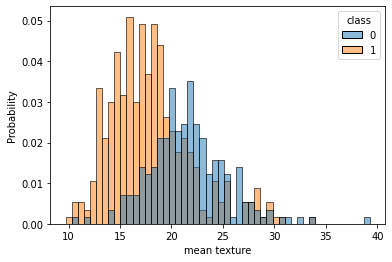

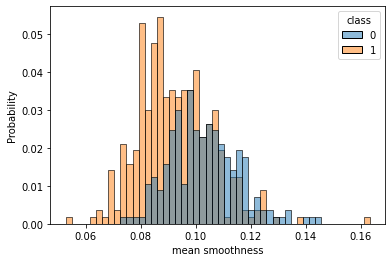

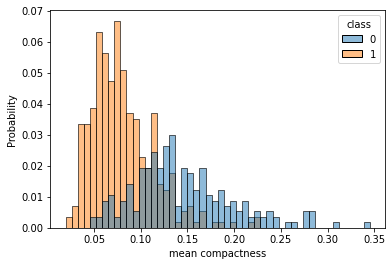

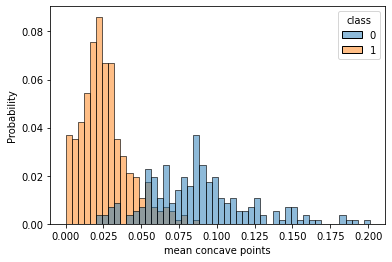

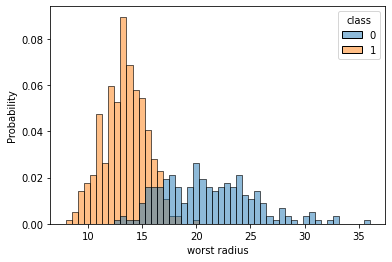

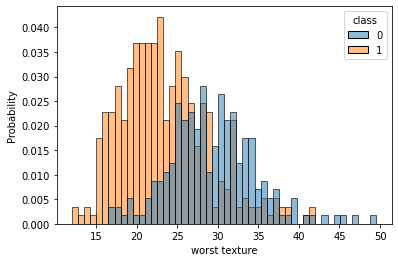

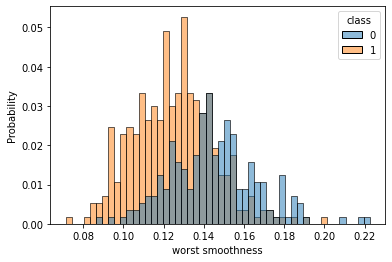

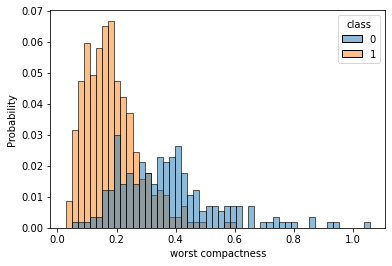

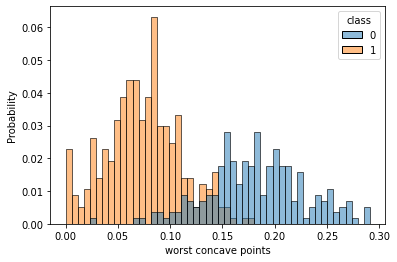

In [15]:
for c in cols[:-1]:
  sns.histplot(df, x=c, hue=cols[-1], bins=50, stat = 'probability')
  plt.show()

**Train Model with Pytorch**

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [17]:
data = torch.from_numpy(df[cols].values).float()

data.shape ## 10개의 Attribute, 1개의 class

torch.Size([569, 11])

In [18]:
# Split x and y

x = data[:,:-1]
y = data[:,-1:]

print(x.shape, y.shape)

torch.Size([569, 10]) torch.Size([569, 1])


In [19]:
# Define configurations
n_epochs = 200000
learning_rate = 1e-2
print_interval = 10000

In [20]:
# Define costom model

class MyModel(nn.Module):

  def __init__(self, input_dim, output_dim):
    self.input_dim = input_dim
    self.output_dim = output_dim

    super().__init__()

    self.linear = nn.Linear(input_dim, output_dim)
    self.act = nn.Sigmoid()


  def forward(self, x):
    y = self.act(self.linear(x))

    return y

In [23]:
model = MyModel(input_dim=x.size(-1),
                output_dim=y.size(-1))

crit = nn.BCELoss() # Difine BCELoss instead of MSELoss

optimizer = optim.SGD(model.parameters(),
                      lr=learning_rate)

In [24]:
for i in range(n_epochs):
  y_hat = model(x)
  loss = crit(y_hat, y)

  optimizer.zero_grad()
  loss.backward()

  optimizer.step()

  if (i+1) % print_interval == 0 :
    print('Epoch %d: loss=-%.4e' % (i+1,loss))


Epoch 10000: loss=-2.7771e-01
Epoch 20000: loss=-2.2907e-01
Epoch 30000: loss=-2.0003e-01
Epoch 40000: loss=-1.8108e-01
Epoch 50000: loss=-1.6784e-01
Epoch 60000: loss=-1.5808e-01
Epoch 70000: loss=-1.5060e-01
Epoch 80000: loss=-1.4467e-01
Epoch 90000: loss=-1.3986e-01
Epoch 100000: loss=-1.3588e-01
Epoch 110000: loss=-1.3251e-01
Epoch 120000: loss=-1.2963e-01
Epoch 130000: loss=-1.2714e-01
Epoch 140000: loss=-1.2496e-01
Epoch 150000: loss=-1.2303e-01
Epoch 160000: loss=-1.2132e-01
Epoch 170000: loss=-1.1978e-01
Epoch 180000: loss=-1.1839e-01
Epoch 190000: loss=-1.1713e-01
Epoch 200000: loss=-1.1598e-01


**Let's see result!**

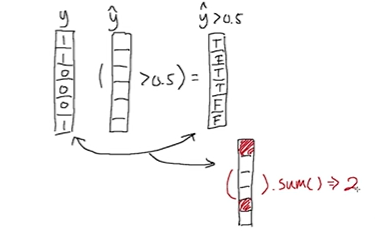

In [30]:
correct_cnt = (y == (y_hat > .5)).sum()
total_cnt = float(y.size(0))

print('Accuracy: %.4f' % (correct_cnt / total_cnt))

Accuracy: 0.9666


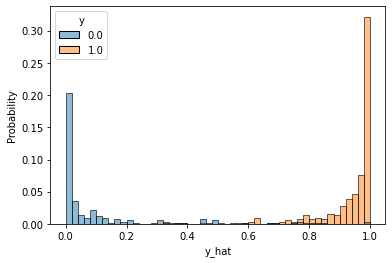

In [32]:
df = pd.DataFrame(torch.cat([y, y_hat], dim=1).detach().numpy(),
                  columns=['y','y_hat'])

sns.histplot(df, x='y_hat', hue='y', bins=50, stat='probability')
plt.show()